In [ ]:
from google.colab import files
uploaded = files.upload()

Saving winequality-red.csv to winequality-red.csv


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import numpy as np


In [ ]:
# Load the dataset
df = pd.read_csv("winequality-red.csv")
print(df.head())
print(df.tail())
print(df.columns)

   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  
0      9.4        5  
1      9.8        5  
2      9.8        5 

In [ ]:
# Define input features and target variable with correct column names
X = df[["fixed acidity", "volatile acidity", "citric acid", "residual sugar",
        "chlorides", "free sulfur dioxide", "total sulfur dioxide",
        "density", "pH", "sulphates", "alcohol"]]
y = df["quality"]

# Train-test split (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
# Initialize and train the model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict and evaluate
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {round(mse, 2)}")
print(f"Model Coefficients: {model.coef_}")
print(f"Model Intercept: {model.intercept_}")

Mean Squared Error: 0.39
Model Coefficients: [ 2.30853339e-02 -1.00130443e+00 -1.40821461e-01  6.56431104e-03
 -1.80650315e+00  5.62733439e-03 -3.64444893e-03 -1.03515936e+01
 -3.93687732e-01  8.41171623e-01  2.81889567e-01]
Model Intercept: 14.355105195761741


In [ ]:
# Predicting quality for a new wine sample with correct feature names
new_data = pd.DataFrame([[7.4, 0.7, 0, 1.9, 0.076, 11, 34, 0.9978, 3.51, 0.56, 9.4]],
    columns=["fixed acidity", "volatile acidity", "citric acid", "residual sugar",
             "chlorides", "free sulfur dioxide", "total sulfur dioxide",
             "density", "pH", "sulphates", "alcohol"])

predicted_quality = model.predict(new_data)
print(f"Predicted quality for the new wine: {round(predicted_quality[0], 2)}")


Predicted quality for the new wine: 5.05


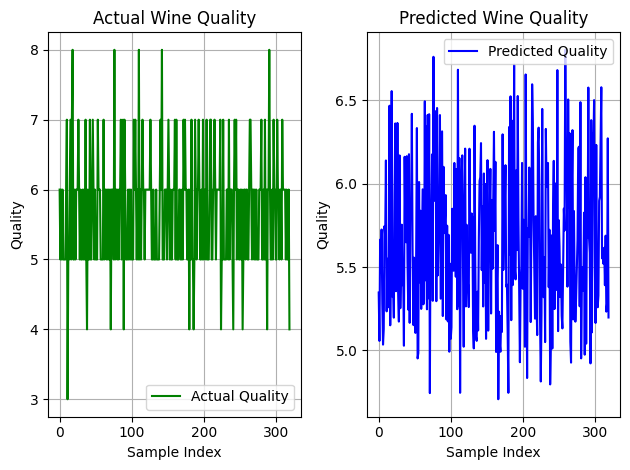

In [ ]:
# Actual wine quality
plt.subplot(1, 2, 1)
plt.plot(y_test.values, label="Actual Quality", color="green")
plt.title("Actual Wine Quality")
plt.xlabel("Sample Index")
plt.ylabel("Quality")
plt.grid(True)
plt.legend()

# Predicted wine quality
plt.subplot(1, 2, 2)
plt.plot(y_pred, label="Predicted Quality", color="blue")
plt.title("Predicted Wine Quality")
plt.xlabel("Sample Index")
plt.ylabel("Quality")
plt.grid(True)
plt.legend()

plt.tight_layout()
plt.show()

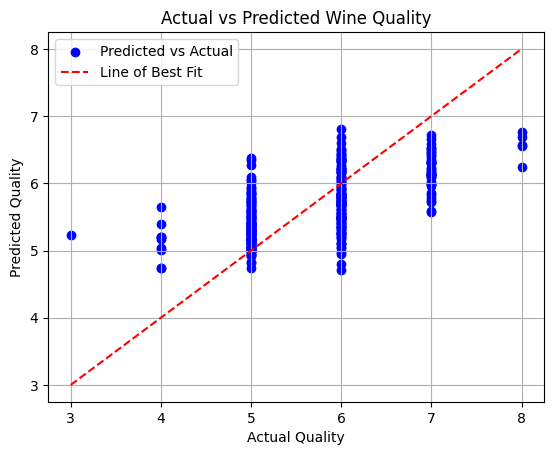

In [ ]:
# Plot Actual vs Predicted Wine Quality
plt.scatter(y_test, y_pred, color="blue", label="Predicted vs Actual")
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color="red", linestyle="--", label="Line of Best Fit")
plt.title("Actual vs Predicted Wine Quality")
plt.xlabel("Actual Quality")
plt.ylabel("Predicted Quality")
plt.legend()
plt.grid(True)
plt.show()